# **Olist Stores - Visualização de Dados**

## Análise de compras online realizadas pela Olist Store de 2016 à 2018

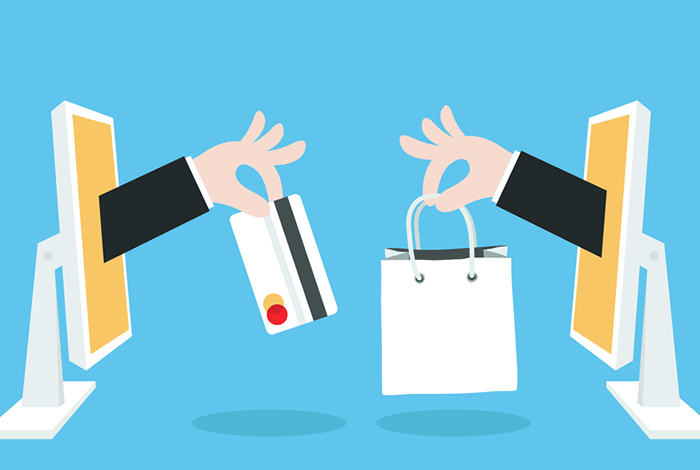

Perguntas à serem respondidas:

- Qual foi o valor do item mais caro e do mais barato
- Qual foi a média de frete
- Qual foi a média de preço dos produtos
- Qual ano teve o maior volume de vendas

In [3]:
# primeiro vamos começar importando as bibliotecas necessárias

import pandas as pd                       # para manipulação de dados
import matplotlib.pyplot as plt           # para engine de visualização de dados
import seaborn as sns                     # para plotar gráficos

In [4]:
# importando os datasets
# utilizaremos dois datasets: 1 que contém as datas de compra e 1 que contém os valores dos produtos

df_produtos = pd.read_csv("/content/drive/MyDrive/olist_order_items_dataset.csv")
df_data = pd.read_csv("/content/drive/MyDrive/olist_orders_dataset.csv")

In [5]:
# visualizando o dataset de produtos

df_produtos.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [6]:
# visualizando o dataset de datas do pedido

df_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# não precisaremos excluir as colunas que não queremos nos dois dataframes, pois iremos mesclar e selecionar apenas as colunas que queremos
# faremos isso para obter as informações de ambos os conjuntos em um único dataframe
# utilizaremos a chave primária "order_id", que está presente em ambos os datasets para fazer essa junção

olist = pd.merge(df_produtos[["order_id", "price", "freight_value"]],
                 df_data[["order_id", "order_status", "order_approved_at"]],
                 on="order_id")

In [8]:
# verificando o dataset mesclado

olist.head()

,order_id,price,freight_value,order_status,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,delivered,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,delivered,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,delivered,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,delivered,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,delivered,2017-02-04 14:10:13


In [9]:
# agora podemos ver algumas informações básicas e estatísticas

olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           112650 non-null  object 
 1   price              112650 non-null  float64
 2   freight_value      112650 non-null  float64
 3   order_status       112650 non-null  object 
 4   order_approved_at  112635 non-null  object 
dtypes: float64(2), object(3)
memory usage: 5.2+ MB


In [10]:
# verificamos que existem 112650 registros no total
# vamos verificar quantos desses possuem registros nulos

olist.isnull().sum()

order_id              0
price                 0
freight_value         0
order_status          0
order_approved_at    15
dtype: int64

In [31]:
# a coluna que mostra a data e hora da compra está no formato object
# vamos tranforma-la em formato DATE pegando apenas o ano

olist["order_approved_at"] = pd.to_datetime(olist["order_approved_at"]).dt.year

In [12]:
# na coluna "order_approved_at" possuímos 15 valores nulos
# vamos checar que registros são esses para analisar o que faremos

olist.loc[olist["order_approved_at"].isnull()]

,order_id,price,freight_value,order_status,order_approved_at
8204,12a95a3c06dbaec84bcfb0e2da5d228a,79.99,15.77,delivered,NaT
19005,2babbb4b15e6d2dfe95e2de765c97bce,79.99,26.82,delivered,NaT
20473,2eecb0d85f281280f79fa00f9cec1a95,135.00,19.23,delivered,NaT
26393,3c0b8706b065f9919d0505d3b3343881,133.99,23.20,delivered,NaT
36128,51eb2eebd5d76a24625b31c33dd41449,59.90,17.16,delivered,NaT
40822,5cf925b116421afa85ee25e99b4c34fb,79.99,26.82,delivered,NaT
49309,7002a78c79c519ac54022d4f8a65e6e8,45.90,14.52,delivered,NaT
49336,7013bcfc1c97fe719a7b5e05e61c12db,49.99,15.53,delivered,NaT
59699,88083e8f64d95b932164187484d90212,49.00,14.52,delivered,NaT
59700,88083e8f64d95b932164187484d90212,49.00,14.52,delivered,NaT


In [13]:
# para lidar com valores faltantes, podemos usar a média da coluna, inserir um valor fixo, etc
# porém neste caso, como são apenas 15 registros de 112650 com a data faltante, vamos eliminá-los

olist.dropna(how="any", inplace=True)

In [14]:
# vamos verificar novamente os registros nulos para ver se foram exclúidos

olist.isnull().sum()

order_id             0
price                0
freight_value        0
order_status         0
order_approved_at    0
dtype: int64

In [16]:
# vamos verificar os valores máximos e mínimos na coluna "price" e "freight_value"

max = olist["price"].max()
min = olist["price"].min()


maxf = olist["freight_value"].max()
minf = olist["freight_value"].min()

print("Coluna PRICE - Valor máximo ({}) e mínimo ({})".format(max, min))
print("Coluna FREIGHT_VALUE - Valor máximo ({}) e mínimo ({})".format(maxf, minf))

Coluna PRICE - Valor máximo (6735.0) e mínimo (0.85)
Coluna FREIGHT_VALUE - Valor máximo (409.68) e mínimo (0.0)


In [32]:
# concluímos que na coluna "price", os valores são muito variantes, tendo o valor máximo em R$6735,00 e o mínimo em R$0,85
# já na coluna "freight_value" constamos que existem fretes que saíram de graça pois o valor é R$0,0
# vamos checar se o frete gratúito é genuíno

olist.loc[olist["freight_value"] == 0.0]

,order_id,price,freight_value,order_status,order_approved_at
114,00404fa7a687c8c44ca69d42695aae73,99.9,0.0,delivered,2018
258,00a870c6c06346e85335524935c600c0,69.9,0.0,delivered,2018
483,011c899816ea29773525bd3322dbb6aa,99.9,0.0,delivered,2018
508,012b3f6ab7776a8ab3443a4ad7bef2e6,53.9,0.0,delivered,2018
509,012b3f6ab7776a8ab3443a4ad7bef2e6,53.9,0.0,delivered,2018
...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,53.9,0.0,delivered,2018
111497,fd4907109f6bac23f07064af84bec02d,219.0,0.0,delivered,2018
111649,fd95e4b85ebbb81853d4a6be3d61432b,106.9,0.0,delivered,2018
112182,fee19a0dc7358b6962a611cecf6a37b4,195.0,0.0,delivered,2017


In [18]:
# sim, existe o frete grátis
# 383 registros possuem esse detalhe, então se é um padrão, podemos considerar genuíno
# vamos agora respondr à pergunta: qual é a média de frete

olist.freight_value.mean()

19.9904591823166

In [19]:
olist.freight_value.mode()

0    15.1
dtype: float64

In [20]:
# a média e a moda estão bem próximas, então se fossemos considerar uma faixa de frete
# ela estaria entre 10 e 20
# agora vamos ver os mesmos cálculos, só que na coluna "price"

olist.price.mean()

120.65497642841201

In [21]:
olist.price.mode()

0    59.9
dtype: float64

In [22]:
# o ticket médio está em R$120,00
# se o modelo de negócios da Olist for de 10% de porcentagem sobre cada transação
# então a média de comissão por venda de produto será de R$12,00

In [45]:
# agora vamos ver uma visão mais macro do negócio
# vamos descobrir qual ano teve o maior volume de vendas

olist_ano = olist['order_approved_at'].value_counts()

olist_ano

2018    61477
2017    50788
2016      370
Name: order_approved_at, dtype: int64

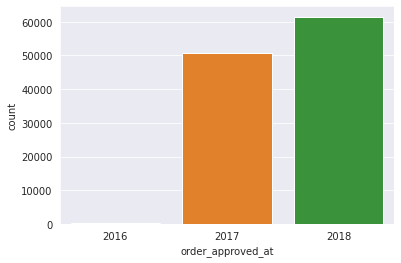

In [40]:
# já sabemos que foi o ano de 2018
# vamos plotar um gráfico de colunas simples para visualizar melhor

sns.set_style("darkgrid")

sns.countplot(x="order_approved_at", data=olist)

In [54]:
# como podemos ver, 2016 foi o ano que teve menos pedidos aprovados
# isso pode ser devido ao fato da empresa ter sido fundada em 2015
# de 2016 para 2018 o salto foi gigante, tendo mais de 61 mil pedidos processados